# Mon 1er Réseau Neuronal

<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/neutral-network-diagram.svg">

## Description: 
- Choisir un Dataset simple et clean. 
- Choisir de faire une régression ou classification. 
- Construire le réseau neuronal avec l'exemple suivant. 
- Les hidden layers pourrons avoir des fonctions d'activation "relu".

## Rendu: 
- Présentation schematique du réseau neuronal
- Présentation du notebook
    - La construction du réseau
    - Les résultats obtenus
    - Le scoring

In [ ]:
# !pip install tensorflow

In [1]:
import tensorflow as tf

2023-05-05 12:29:21.223776: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 12:29:21.897110: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-05 12:29:22.065962: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-05 12:29:22.066035: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [2]:
from tensorflow.keras import Sequential, layers

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
import pandas as pd

In [5]:
dict = {}
f1,f2,f3,f4 = [],[],[],[]
for ar in iris.data:
    f1.append(ar[0])
    f2.append(ar[1])
    f3.append(ar[2])
    f4.append(ar[3])
    
dict[iris.feature_names[0]] = f1
dict[iris.feature_names[1]] = f2
dict[iris.feature_names[2]] = f3
dict[iris.feature_names[3]] = f4

dict['target'] = iris.target

In [6]:
df = pd.DataFrame(data = dict)

In [7]:
df['target.names'] = df['target'].map(lambda x: iris.target_names[x])

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target.names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
# Ex:
# X de 15 features
# y target de 3 dim

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target.names'],
      dtype='object')

In [11]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]

In [12]:
y = df[['target']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [14]:
y_train

,target
22,0
15,0
65,1
11,0
42,0
...,...
71,1
106,2
14,0
92,1


In [15]:
### Regression of size 4
#model = Sequential()
#model.add(layers.Dense(10, activation='relu', input_dim=15))
#model.add(...)
#model.add(layers.Dense(3, activation='linear'))


### Classification with 8 classes
tf.random.set_seed = 42
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(4))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

2023-05-05 12:37:12.270685: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-05 12:37:12.271941: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-05 12:37:12.272404: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vivobook): /proc/driver/nvidia/version does not exist
2023-05-05 12:37:12.275894: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 5,703
Trainable params: 5,703
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "Adam", metrics = ['accuracy'])

In [18]:
history = model.fit(X_train, y_train, batch_size=20, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
6/6 [==============================] - 1s 71ms/step - loss: 1.2541 - accuracy: 0.3417 - val_loss: 1.1061 - val_accuracy: 0.3000
Epoch 2/100
6/6 [==============================] - 0s 15ms/step - loss: 1.0165 - accuracy: 0.5167 - val_loss: 0.9649 - val_accuracy: 0.7000
Epoch 3/100
6/6 [==============================] - 0s 15ms/step - loss: 0.9423 - accuracy: 0.6417 - val_loss: 0.9085 - val_accuracy: 0.6333
Epoch 4/100
6/6 [==============================] - 0s 14ms/step - loss: 0.8807 - accuracy: 0.7000 - val_loss: 0.8411 - val_accuracy: 0.8000
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.8073 - accuracy: 0.9083 - val_loss: 0.7766 - val_accuracy: 0.8333
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.7489 - accuracy: 0.7917 - val_loss: 0.7339 - val_accuracy: 0.8000
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.7010 - accuracy: 0.8500 - val_loss: 0.6719 - val_accuracy: 0.9333
Epoch 8/100
6/6 [======

In [19]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 43ms/step - loss: 0.0812 - accuracy: 1.0000


[0.08124127984046936, 1.0]

In [20]:
history.history

{'loss': [1.2540985345840454,
  1.016489863395691,
  0.9423414468765259,
  0.8806735873222351,
  0.8073142170906067,
  0.7489311099052429,
  0.7009907960891724,
  0.6457131505012512,
  0.6017739176750183,
  0.5601761937141418,
  0.5235961079597473,
  0.49043771624565125,
  0.4617674648761749,
  0.4356471300125122,
  0.4137741029262543,
  0.3931541442871094,
  0.3763185441493988,
  0.3563942015171051,
  0.34852084517478943,
  0.33164358139038086,
  0.31227347254753113,
  0.29898741841316223,
  0.2904442250728607,
  0.27112051844596863,
  0.2582503855228424,
  0.24475271999835968,
  0.23595401644706726,
  0.22298380732536316,
  0.21323131024837494,
  0.2156265676021576,
  0.1997852921485901,
  0.1885310560464859,
  0.18205828964710236,
  0.17117373645305634,
  0.1662447601556778,
  0.16115355491638184,
  0.1545693427324295,
  0.14983704686164856,
  0.14163723587989807,
  0.14105933904647827,
  0.13166525959968567,
  0.13448134064674377,
  0.1276954859495163,
  0.12110025435686111,
  0.12

In [21]:
import matplotlib.pyplot as plt

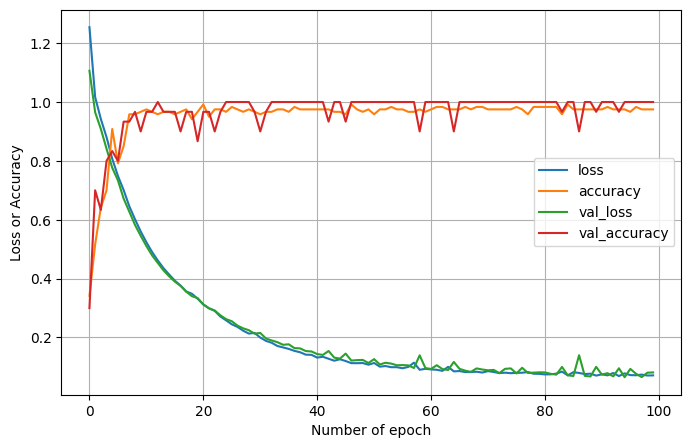

In [23]:
pd.DataFrame(history.history).plot(figsize=(8,5), grid=True)
plt.xlabel('Number of epoch')
plt.ylabel('Loss or Accuracy')
plt.show()